<a href="https://colab.research.google.com/github/sreekanth16-dev/Credit-card-churn-prediction/blob/main/Mlproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD CUSTOMER PREDICTION**

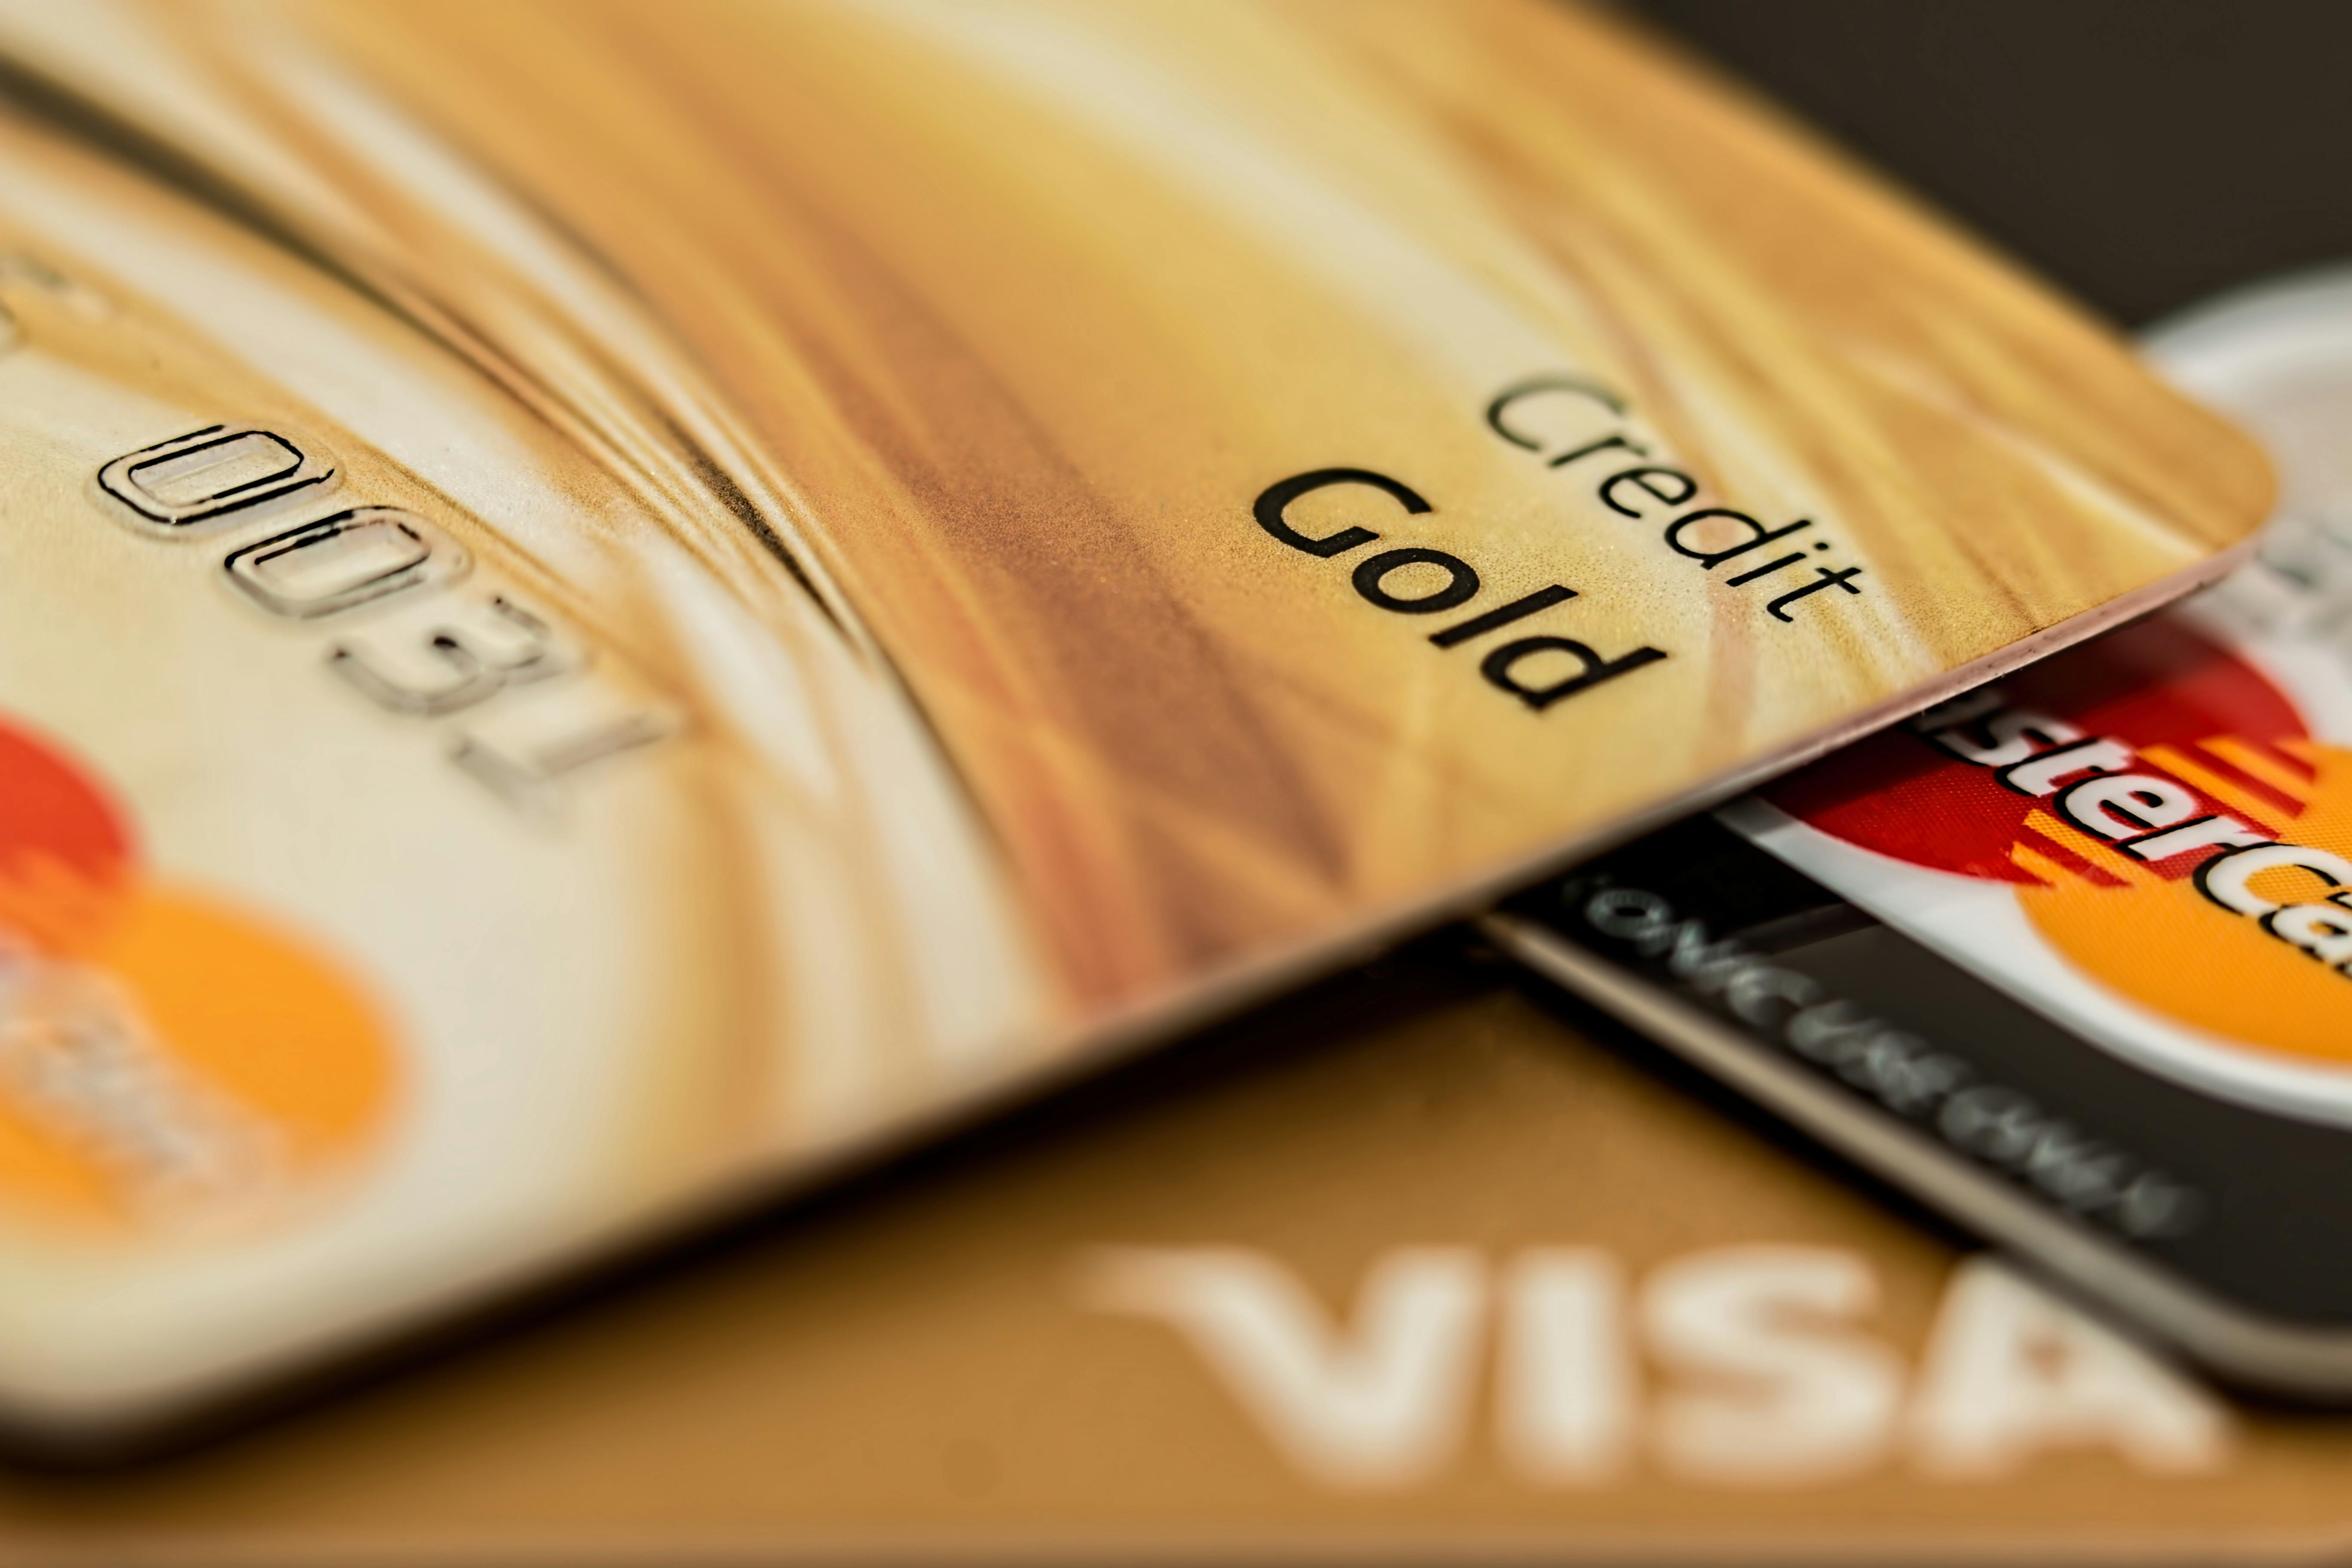

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

## **1.Importing necessary modules for data loading, EDA process,datapreprocessing,data transformation and splitting model implementation and performance measuring**


---




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as se
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,roc_curve,auc


In [ ]:
df=pd.read_csv('/content/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## **2.Collecting and studying dataset for further process**

---



In [ ]:


df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## **3.EDA and Data preprocessing**



---





In [ ]:
df.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


Here columns like 'Education_Level', 'Marital_Status', 'Income_Category' has value unknown so we need convert it into null value.

In [ ]:
col=['Education_Level','Marital_Status','Income_Category']
for co in col:
  df[co]=df[co].str.replace('Unknown','0')




In [ ]:
df.loc[df.Education_Level=='0','Education_Level']=np.NaN
df.loc[df.Marital_Status=='0','Marital_Status']=np.NaN
df.loc[df.Income_Category=='0','Income_Category']=np.NaN

In [ ]:
df.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0


filling the missing values







In [ ]:
col=['Education_Level','Marital_Status','Income_Category']
for cl in col:
  df[cl]=df[cl].fillna(df[cl].mode()[0])
df.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


**Checking Datatypes of Features and Target**



---





In [ ]:
df.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


**Label Encoding**

---





In [ ]:
encoder=LabelEncoder()
cols=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
for c in cols:
  encoder.fit(df[c])
  print(encoder.classes_)
  df[c]=encoder.transform(df[c])

['Attrited Customer' 'Existing Customer']
['F' 'M']
['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated']
['Divorced' 'Married' 'Single']
['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K']
['Blue' 'Gold' 'Platinum' 'Silver']


**Visualization**

---



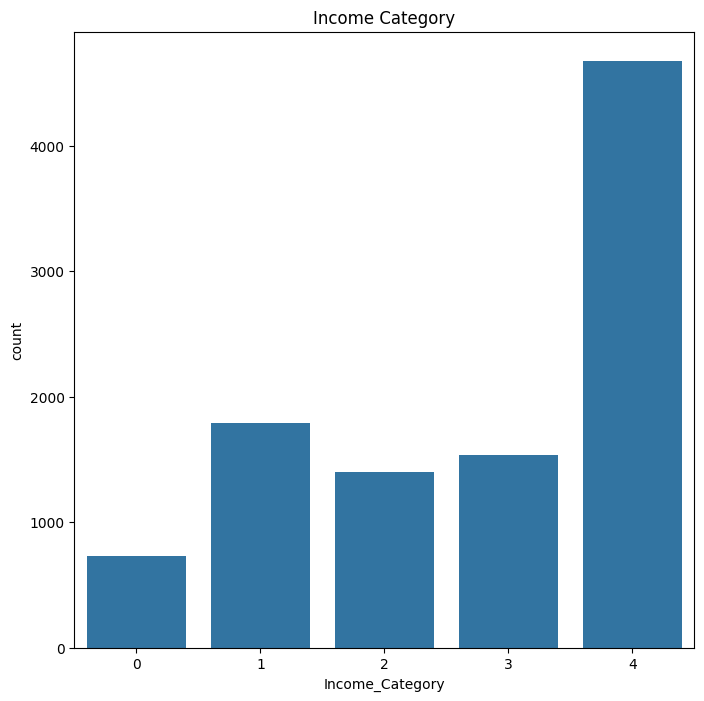

In [ ]:
plt.figure(figsize=(8,8))
se.countplot(x='Income_Category',data=df)
plt.title('Income Category')
plt.show()

**Insight:**
Most of the credit card customer are include in the income category of  less than $40k

<Figure size 800x800 with 0 Axes>

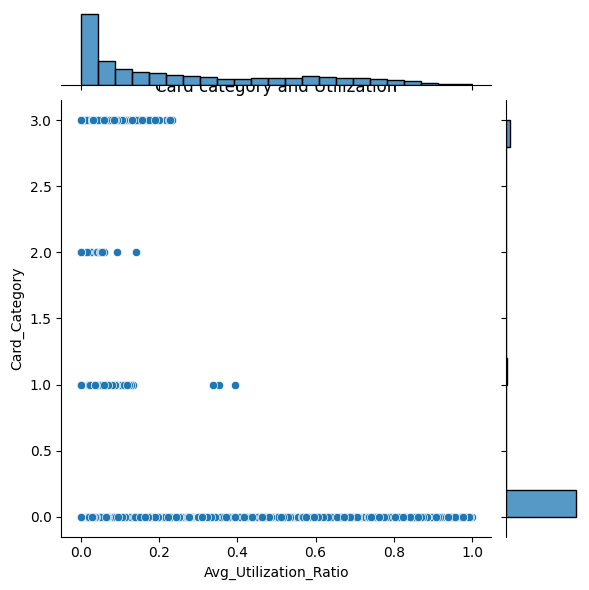

In [ ]:
plt.figure(figsize=(8,8))
se.jointplot(x='Avg_Utilization_Ratio',y='Card_Category',data=df)
plt.title('Card category and Utilization')
plt.show()

**Insight:**

*   Blue category credit card users have high utilization rate
*  Platinum users are less compared to others.


*   most of the people card utilization falls on the range 0-0.2










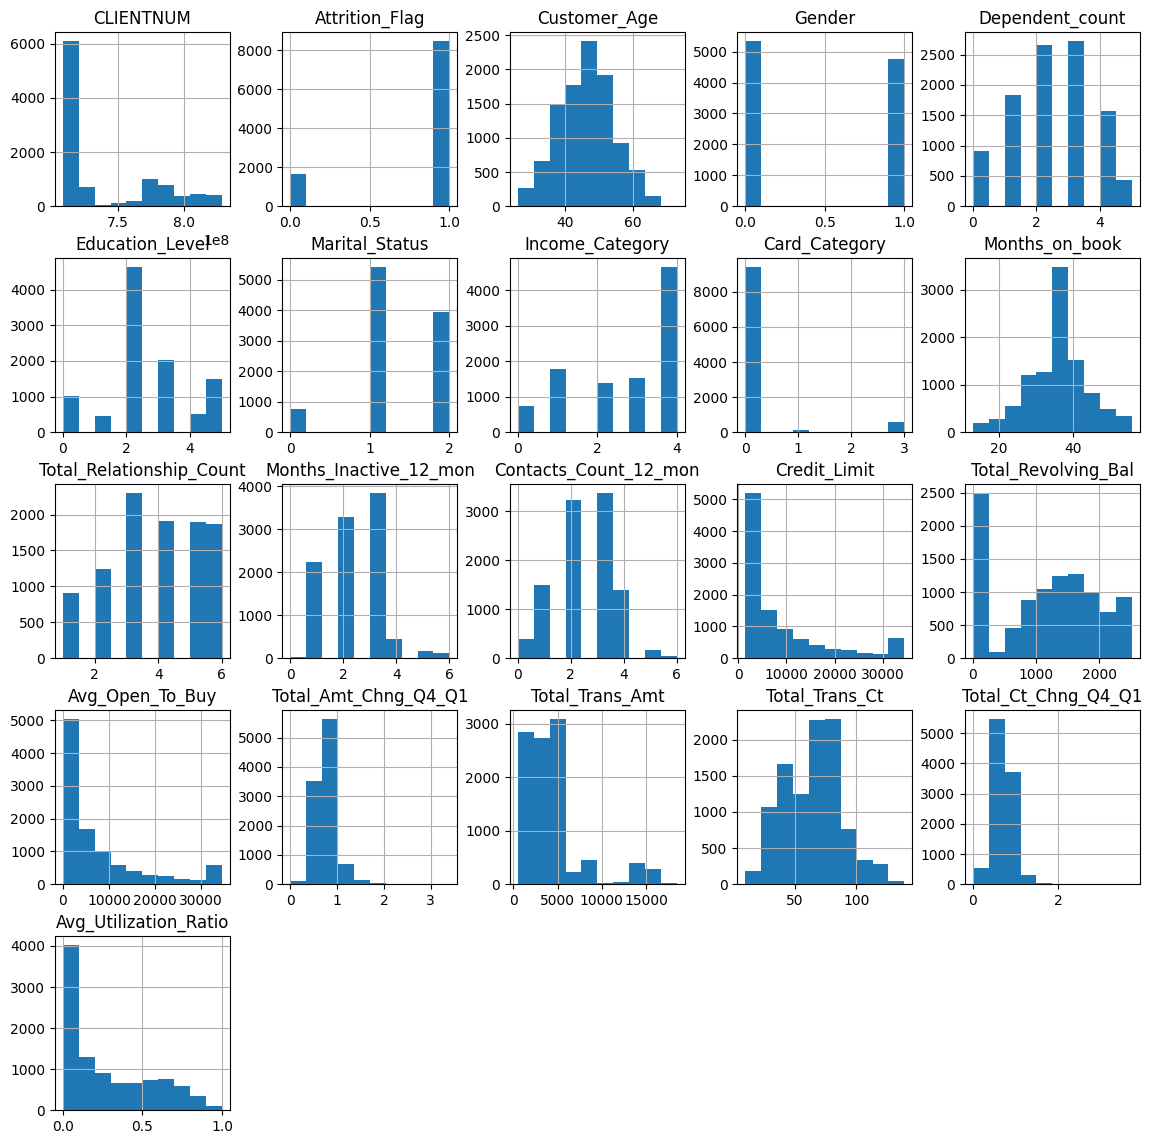

In [ ]:
df.hist(figsize=(14,14))
plt.show()

**Insight:**

* Most of the customers are in the age between 40-50.
*   most of the customers has dependent count of 3.

*   most of the customers have credit limit<5000.
* most of the customers not utilizing the credit card


*   Customer correctly paid credit card dues.
*most of the customer are inactive for 4 times in last 12 months.







<Axes: >

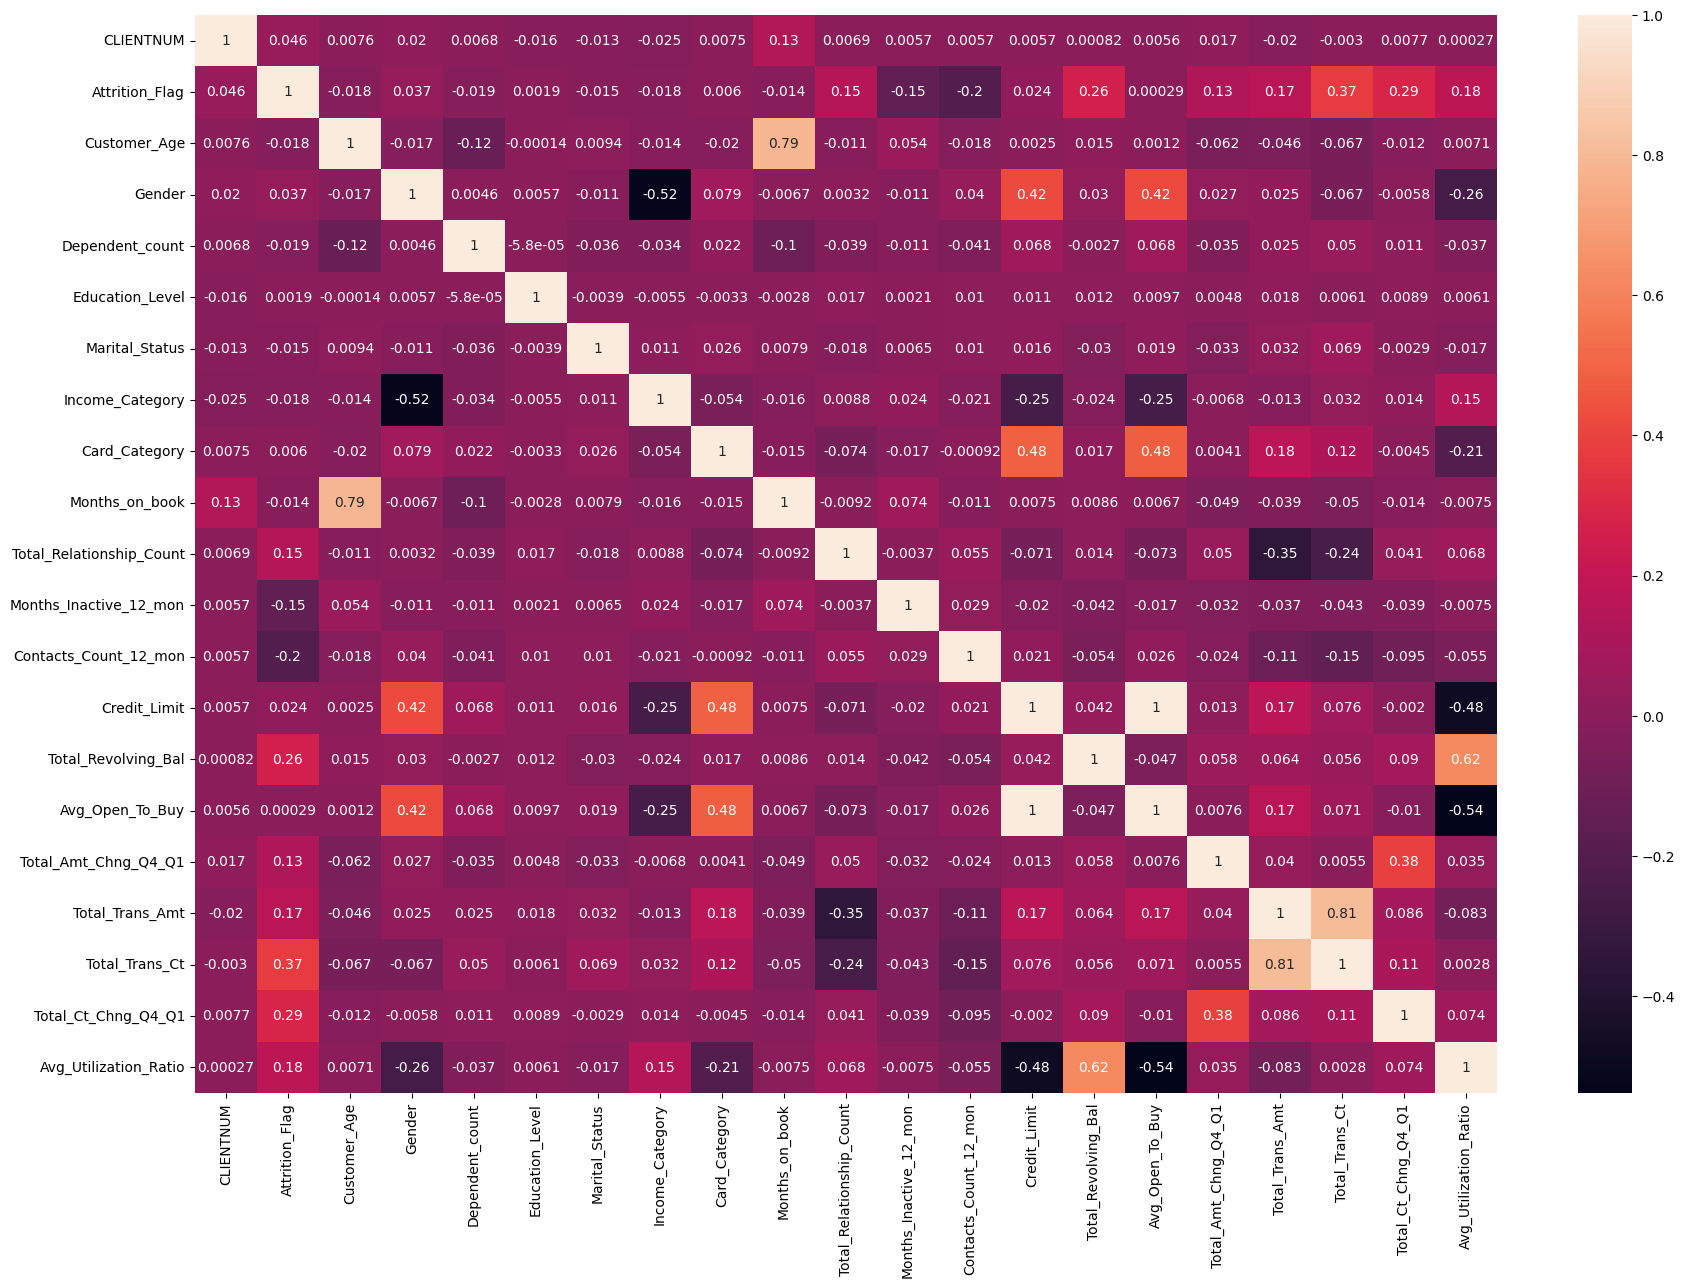

In [ ]:
plt.figure(figsize=(21,14))
se.heatmap(df.corr(),annot=True)

**Insight:**

*  Customer_Age,Gender,Dependent_coun,Education_Level	,Marital_Status	,Income_Category
Card_Category	,Months_on_book,Credit_Limit,Avg_Open_To_Buy  has less correlation with atrrition flag,they have approximately equal to zero.
*   Total_Amt_Chng_Q4_Q1	,Total_Trans_Amt	,Total_Trans_Ct	,Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio,Total_Relationship_Count have positive correlation that
means these value increase ,customer existing value increases.


*   Months_Inactive_12_mon, Contacts_Count_12_mon	 have negative correlation with target.






Dropping CLIENTNUM irrelavant data


In [ ]:
df.drop(['CLIENTNUM'],axis=1,inplace=True)

**Intialzing Dependant and Independant variable**

---



In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]



**scalling Features in to range 0-1**

---



In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.40425532, 1.        , 0.6       , ..., 0.24806202, 0.43753366,
        0.06106106],
       [0.4893617 , 0.        , 1.        , ..., 0.17829457, 1.        ,
        0.10510511],
       [0.53191489, 1.        , 0.6       , ..., 0.07751938, 0.6281637 ,
        0.        ],
       ...,
       [0.38297872, 0.        , 0.2       , ..., 0.3875969 , 0.22024771,
        0.        ],
       [0.08510638, 1.        , 0.4       , ..., 0.40310078, 0.19439957,
        0.        ],
       [0.36170213, 0.        , 0.4       , ..., 0.39534884, 0.17474421,
        0.18918919]])

**Splitting Data for testing and training**

---



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape

((7088, 19), (7088,))

## **4.Building Models**

---



****************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.74      0.42      0.54       496
           1       0.90      0.97      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.82      0.70      0.73      3039
weighted avg       0.87      0.88      0.87      3039

****************** SVC() ********************
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       496
           1       0.92      0.98      0.95      2543

    accuracy                           0.92      3039
   macro avg       0.89      0.78      0.82      3039
weighted avg       0.91      0.92      0.91      3039

****************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       496
           1       0.92      0.92      0.92      2543

    accuracy        

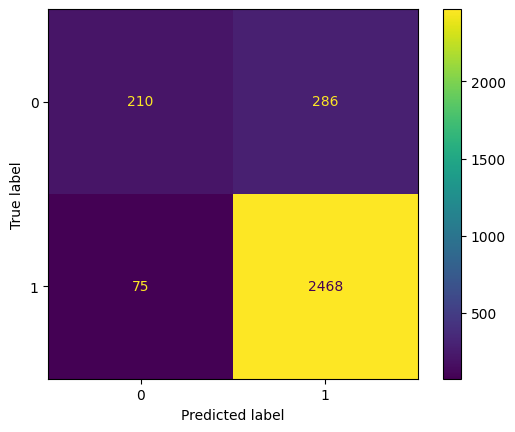

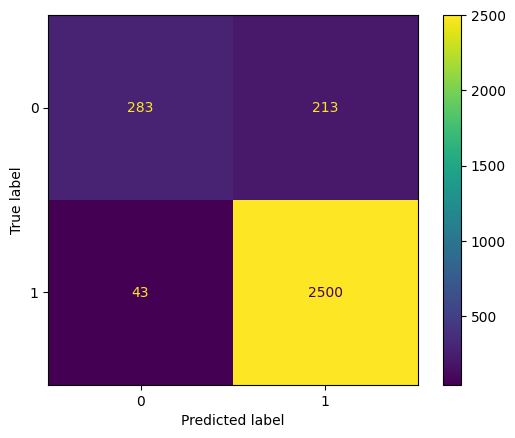

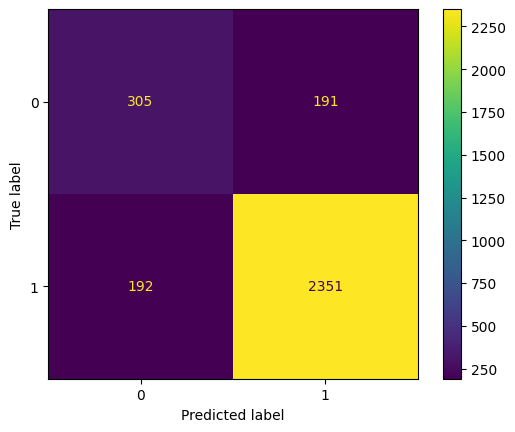

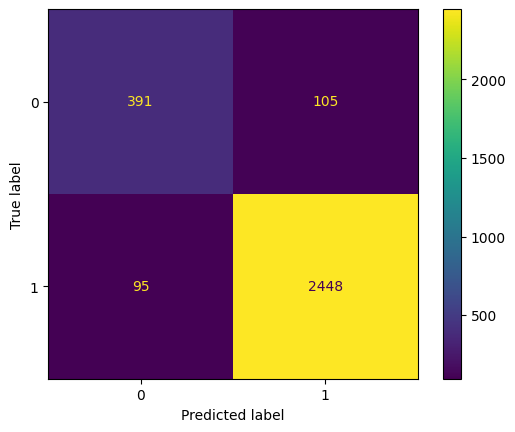

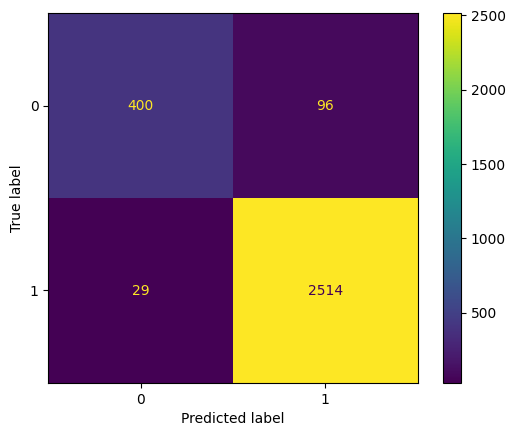

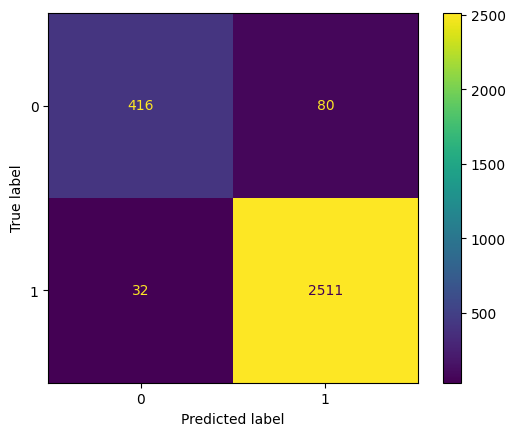

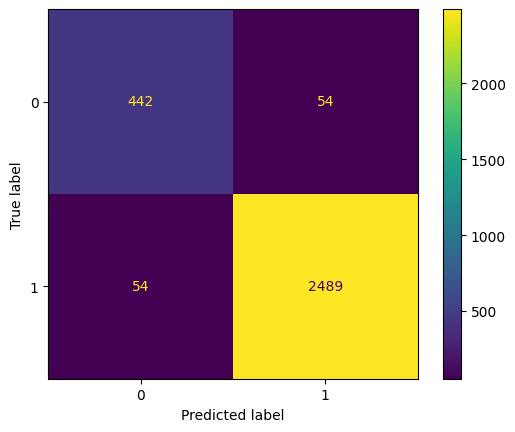

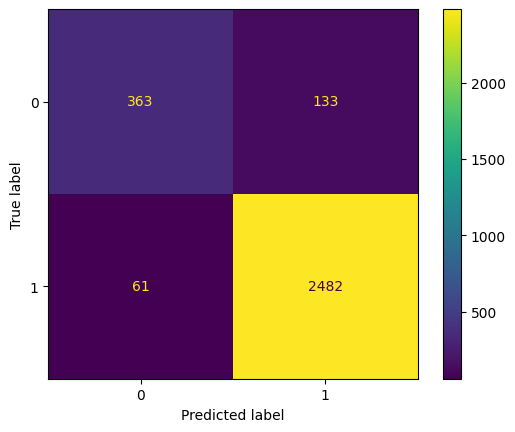

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=42)
gr=GradientBoostingClassifier(random_state=42)
xg=XGBClassifier(random_state=42)
ad=AdaBoostClassifier(random_state=42)
models=[knn,sv,nb,dt,rf,gr,xg,ad]
for m in models:
  print('******************',m,'********************')
  m.fit(X_train,y_train)
  y_pred=m.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))



## **5.Oversampling data to remove imbalance**

---



In [ ]:
y.value_counts()

,count
Attrition_Flag,
1,8500
0,1627


In [ ]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)
y_os.value_counts()

,count
Attrition_Flag,
1,8500
0,8500


In [ ]:
X_os_scaled=scaler.fit_transform(X_os)

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=42)

In [ ]:
for m in models:
  print('****************************',m,'***************************')
  m.fit(X_os_train,y_os_train)
  y_pred2=m.predict(X_os_test)
  print(classification_report(y_os_test,y_pred2))

**************************** KNeighborsClassifier() ***************************
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2548
           1       0.93      0.84      0.89      2552

    accuracy                           0.89      5100
   macro avg       0.90      0.89      0.89      5100
weighted avg       0.90      0.89      0.89      5100

**************************** SVC() ***************************
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2548
           1       0.93      0.93      0.93      2552

    accuracy                           0.93      5100
   macro avg       0.93      0.93      0.93      5100
weighted avg       0.93      0.93      0.93      5100

**************************** GaussianNB() ***************************
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2548
           1       0.81 

## **6.Feature selection**

---



In this dataset ,most of the value is in the form of continous.

In [ ]:
df.corr()['Attrition_Flag']

,Attrition_Flag
Attrition_Flag,1.000000
Customer_Age,-0.018203
Gender,0.037272
Dependent_count,-0.018991
Education_Level,0.001931
Marital_Status,-0.015023
Income_Category,-0.017600
Card_Category,0.006038
Months_on_book,-0.013687
Total_Relationship_Count,0.150005


Dropping column have correlation value approximately equal to zero

In [ ]:
X_os

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000
1,49,0,5,2,2,4,0,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000
2,51,1,3,2,1,3,0,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000
3,40,0,4,3,1,4,0,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000
4,40,1,3,5,1,2,0,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,60,0,0,2,1,4,0,49,3,2,3,5231.205760,0,5231.205760,0.637857,2130,36,0.180401,0.000000
16996,38,0,2,3,1,4,0,36,4,2,2,2965.939003,2389,576.736548,0.443996,2156,63,0.545822,0.806255
16997,48,0,4,2,2,1,0,36,2,3,4,5732.145936,1530,4201.475134,0.533490,1891,28,0.336634,0.266751
16998,45,0,2,0,0,1,0,37,4,3,4,3056.844001,0,3056.844001,0.735532,2579,47,0.432831,0.000000


In [ ]:
X_os.drop(['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status', 'Card_Category','Avg_Open_To_Buy'],axis=1,inplace=True)


In [ ]:
X_new_scaled=scaler.fit_transform(X_os)

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new_scaled,y_os,test_size=0.3,random_state=42)

**************************** KNeighborsClassifier() ***************************
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2548
           1       0.96      0.87      0.91      2552

    accuracy                           0.92      5100
   macro avg       0.92      0.92      0.92      5100
weighted avg       0.92      0.92      0.92      5100



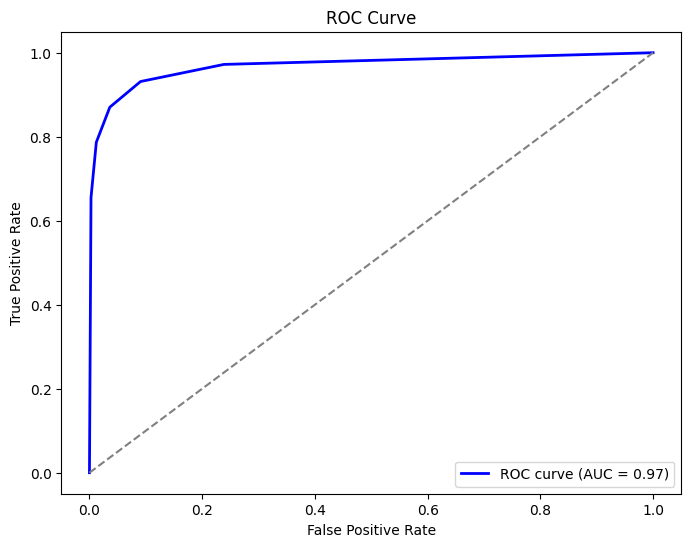

**************************** SVC() ***************************
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2548
           1       0.93      0.92      0.93      2552

    accuracy                           0.93      5100
   macro avg       0.93      0.93      0.93      5100
weighted avg       0.93      0.93      0.93      5100

**************************** GaussianNB() ***************************
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2548
           1       0.80      0.81      0.80      2552

    accuracy                           0.80      5100
   macro avg       0.80      0.80      0.80      5100
weighted avg       0.80      0.80      0.80      5100



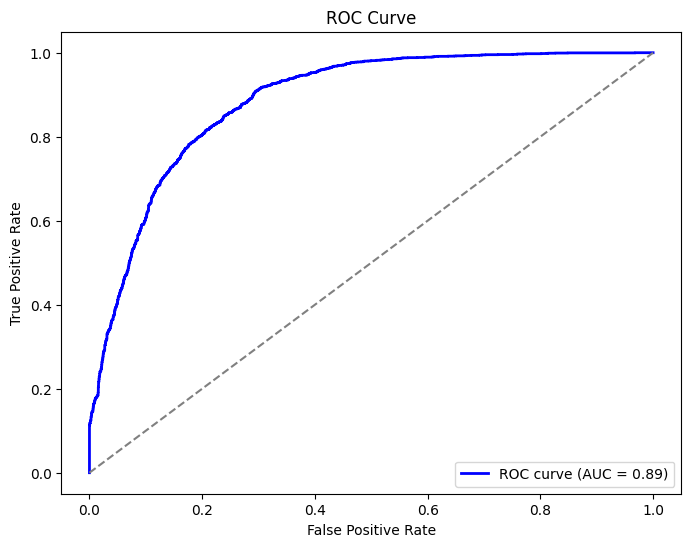

**************************** DecisionTreeClassifier() ***************************
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2548
           1       0.95      0.94      0.95      2552

    accuracy                           0.95      5100
   macro avg       0.95      0.95      0.95      5100
weighted avg       0.95      0.95      0.95      5100



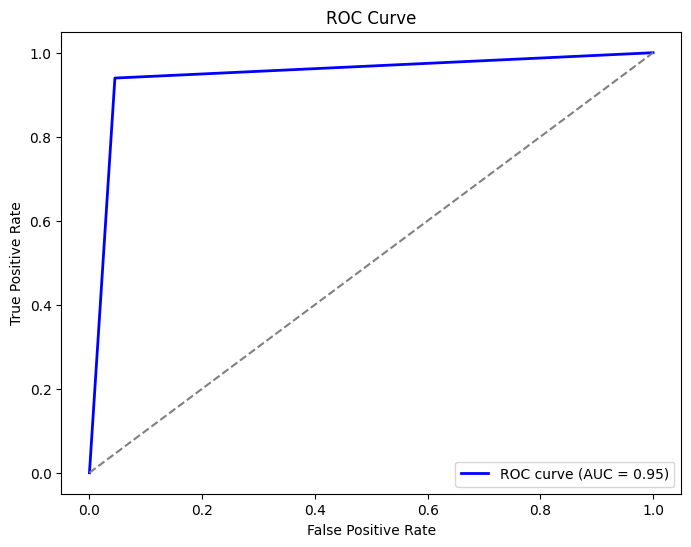

**************************** RandomForestClassifier(random_state=42) ***************************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2548
           1       0.99      0.97      0.98      2552

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



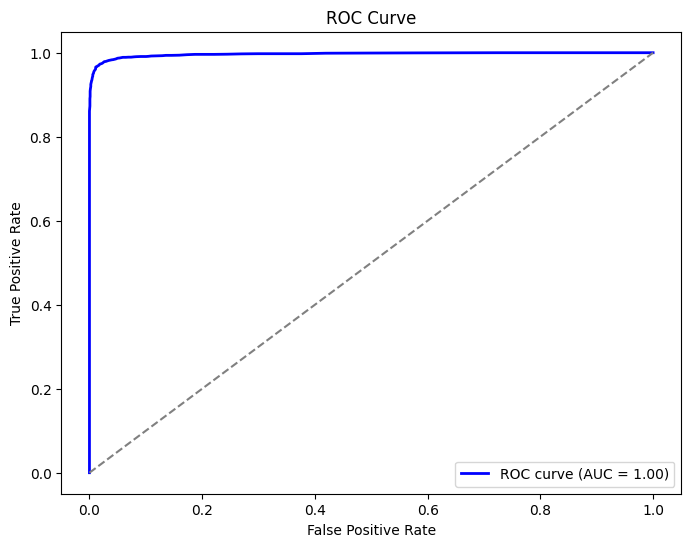

**************************** GradientBoostingClassifier(random_state=42) ***************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2548
           1       0.97      0.95      0.96      2552

    accuracy                           0.96      5100
   macro avg       0.96      0.96      0.96      5100
weighted avg       0.96      0.96      0.96      5100



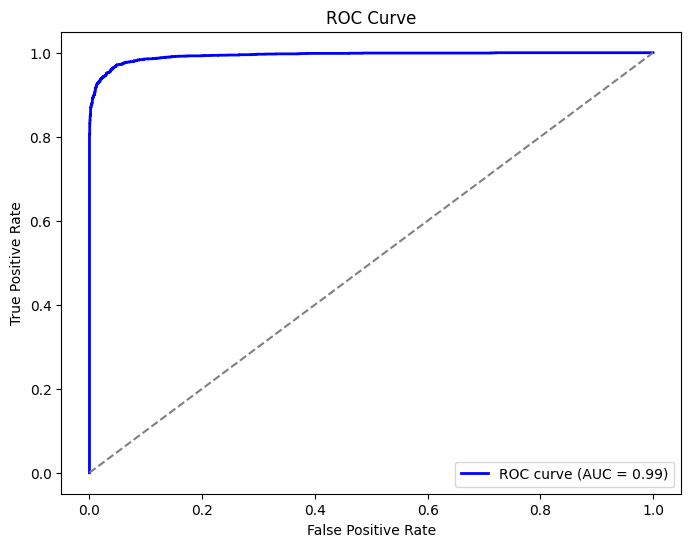

**************************** XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) ***************************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2548
           1       0.99      0.97      0.98      2552

    accuracy           

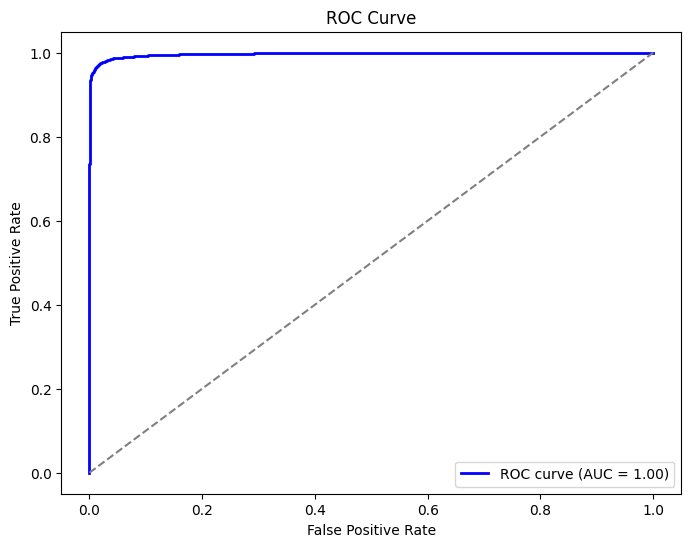

**************************** AdaBoostClassifier(random_state=42) ***************************
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2548
           1       0.94      0.93      0.94      2552

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



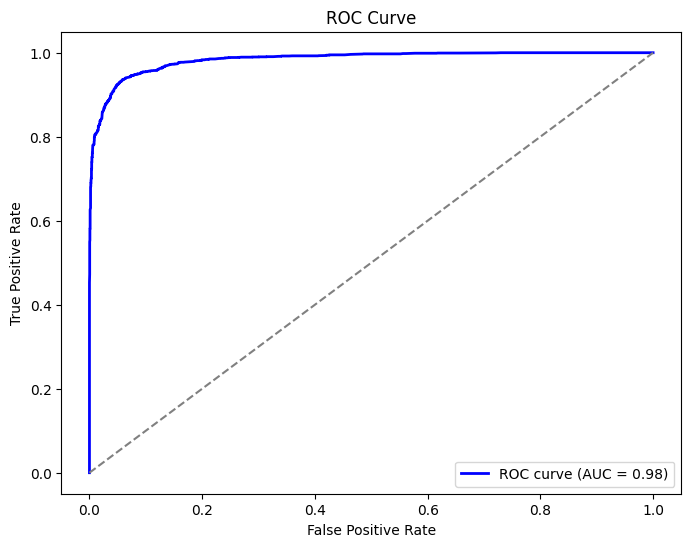

In [ ]:
acc=[]
for m in models:
  print('****************************',m,'***************************')
  m.fit(X_new_train,y_new_train)
  y_pred3=m.predict(X_new_test)
  print(classification_report(y_new_test,y_pred3))
  acc.append(accuracy_score(y_new_test,y_pred3))
  if m!=sv:

    y_scores = m.predict_proba(X_new_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_new_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

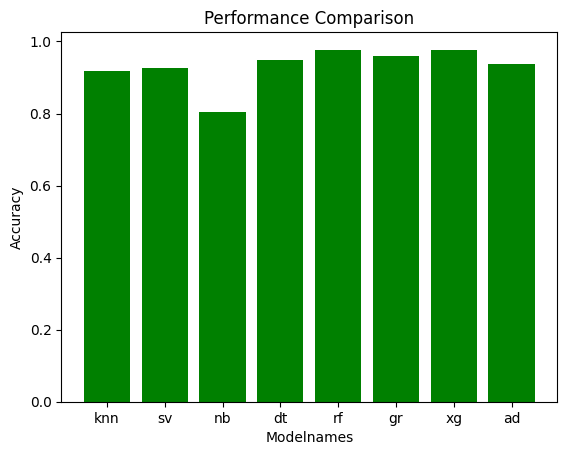

In [ ]:
models=['knn','sv','nb','dt','rf','gr','xg','ad']
plt.bar(models,acc,color='g')
plt.xlabel('Modelnames')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()

Inference: RandomForestClassifer  is best based on the performance.Thus it taken as the solution Model

## **7.Hyper Parameter Tuning**

---



In [ ]:
params= {
    'n_estimators': [100, 200, 300],
    'criterion':['gini','entropy'],
    'max_depth': [10, 20, None],

}

In [ ]:
rsv=RandomizedSearchCV(rf,params,cv=10,scoring='accuracy')
rsv.fit(X_new_train,y_new_train)


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [ ]:
rsv.best_params_

{'n_estimators': 200, 'max_depth': None, 'criterion': 'entropy'}

In [ ]:
y_pred4=rsv.predict(X_new_test)
print(classification_report(y_new_test,y_pred4))

NameError: name 'rsv' is not defined

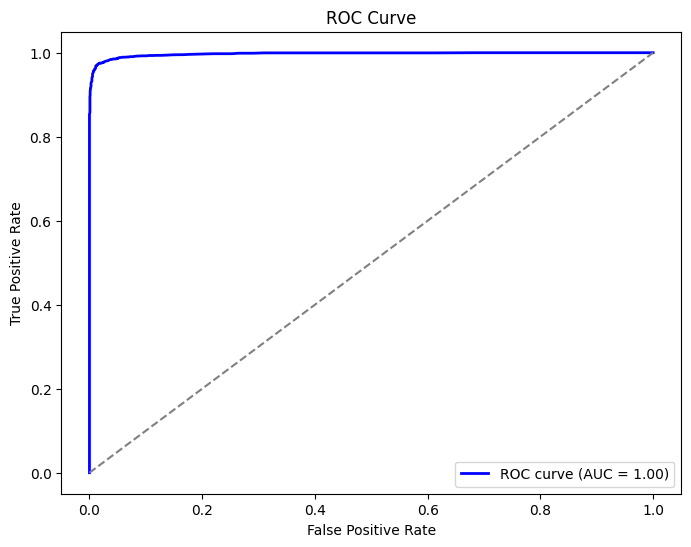

In [ ]:
y_scores = rsv.predict_proba(X_new_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_new_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cases=['imbalanced','balanced','Feature_selection','Hyperparameter tuning']
test=[y_test,y_os_test,y_new_test,y_new_test]
pred=[y_pred,y_pred2,y_pred3,y_pred4]
scores=[]
for i in range(4):
  scores.append(accuracy_score(pred[i],test[i]))
plt.figure(figsize=(8,8))
plt.title('Randomforest at different stages')

plt.bar(cases,scores)
plt.xlabel('Cases')
plt.ylabel('Accuracy')
plt.show()


## **8.Saving model th create GUI**

---



In [ ]:
import pickle
pickle.dump(rf,open('credpred.sav','wb'))
pickle.dump(scaler,open('cred_scaler.sav','wb'))

In [ ]:
X_os.tail()